**Convolutional Neural Network (CNN)**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.datasets import make_regression
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

In [42]:
keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [43]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [44]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

In [45]:
# Hash Table for finding classes of indexes
class_name = {
    0: 'T-shirt/top', 
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot', 
}

In [46]:
# Normalization
X_train = X_train / 255 
X_test = X_test / 255

In [47]:
from keras.utils import to_categorical

In [48]:
# One Hot
y_train = to_categorical(y_train, num_classes=10) 
y_test = to_categorical(y_test, num_classes=10)

In [49]:
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(Input((28, 28, 1)))
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
loss = tf.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy()
model.compile(loss = loss, optimizer = opt, metrics = [metric])

In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,328 (1.13 MB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196,886 (769.09 KB)

In [53]:
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=50)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - categorical_accuracy: 0.7342 - loss: 0.7538 - val_categorical_accuracy: 0.8664 - val_loss: 0.3729
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.8739 - loss: 0.3480 - val_categorical_accuracy: 0.8844 - val_loss: 0.3204
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.8944 - loss: 0.2881 - val_categorical_accuracy: 0.8913 - val_loss: 0.2979
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.9053 - loss: 0.2570 - val_categorical_accuracy: 0.8898 - val_loss: 0.2973
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.9130 - loss: 0.2387 - val_categorical_accuracy: 0.9063 - val_loss: 0.2533
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.9220 - loss: 0.2127 - val_categorical_accuracy: 0.9047 - val_loss: 0.2608
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - categorical_accuracy: 0.9315 - lo

In [55]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


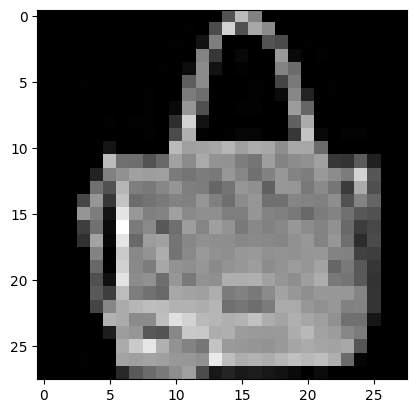

true: Bag
prediction: Bag


In [58]:
index = 2000
plt.imshow(X_test[index], cmap='gray') # cmap can render the photo with filters
plt.show()
print(f'true: {class_name[y_test[index].argmax()]}')
print(f'prediction: {class_name[y_pred[index].argmax()]}')